In [9]:
import pandas as pd
import json

In [24]:
df = pd.read_csv("../data/isketcher/exp_log.csv", index_col=0)
df

,username,mode,timestamp,sketches
seq_id,,,,
015a2d5d-3900-4856-906a-ece200112a03,Test User,1,20220128-211129,"[[[[91, 148], [119, 132], [141, 120], [154, 11..."
6ad652ff-1c19-4a74-996d-becb5956c3f5,Test User,2,20220128-211209,"[[[[92, 72], [101, 71], [128, 68], [152, 64], ..."
97ec4bfb-e8ba-4961-9bd5-1815071d2184,Test User,2,20220128-211252,"[[[[416, 109], [437, 106], [461, 104], [478, 1..."
71309487-258d-4f4f-8ad6-6a0e63bb2a62,Test User,1,20220128-211400,"[[[[115, 90], [143, 86], [161, 84], [180, 83],..."
f719f7ad-a383-4323-93d2-ce9178912ba2,Test User,1,20220128-211420,"[[[[140, 201], [162, 195], [206, 185], [237, 1..."
6c9178be-cc15-4b03-aee3-d65494406cf7,Test User,2,20220128-211448,"[[[[361, 152], [385, 139], [432, 117], [471, 1..."
950416b0-f069-47d3-b9fb-2b1198fb0f52,Test User,1,20220128-211654,"[[[[139, 96], [139, 87], [140, 81], [147, 73],..."
d9f2c829-54f3-4b63-9063-bcac16b327da,Test User,1,20220128-213305,"[[[[141, 136], [156, 133], [185, 129], [205, 1..."


In [25]:
sketches = json.loads(df.loc["d9f2c829-54f3-4b63-9063-bcac16b327da"]["sketches"])
len(sketches)

4

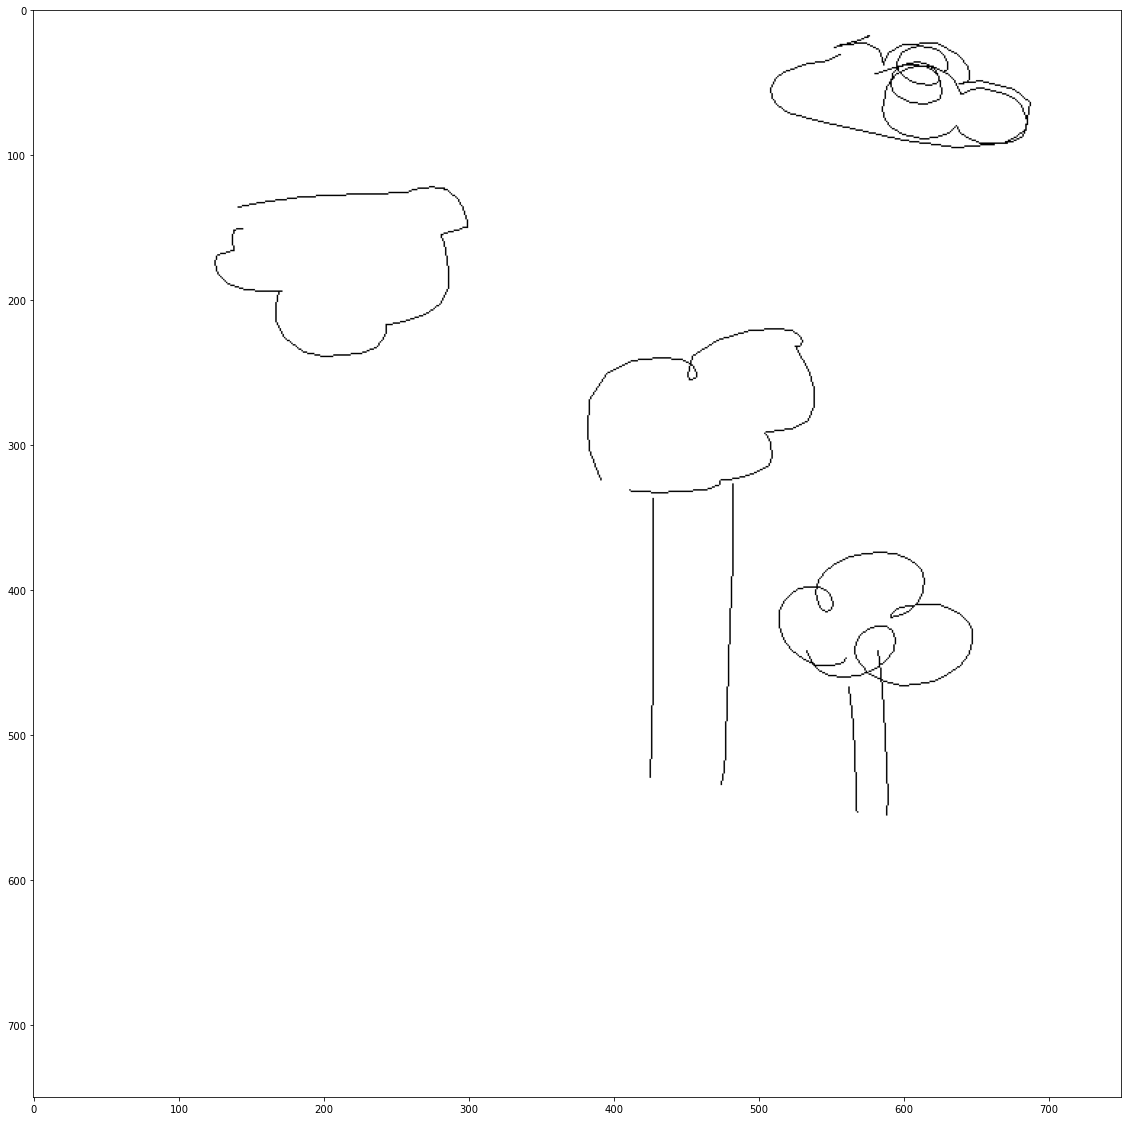

In [30]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

canvas = Image.new('RGB', (750, 750), (255, 255, 255))
draw = ImageDraw.Draw(canvas)

for lines in sketches:
    for line in lines:
        for i in range(len(line)-1):
            x1, y1 = line[i]
            x2, y2 = line[i+1]
            draw.line((x1, y1, x2, y2), fill=(0, 0, 0), width=1)

plt.figure(figsize=(20, 20))
plt.imshow(canvas)
